In [182]:
import pandas as pd

#데이터셋 불러오기
data = pd.read_excel("./Train_dataset.xlsx")

In [183]:
#데이터셋 출력
print(data.head())

         Time    Power
0  20180101_0  105.760
1  20180101_1  104.944
2  20180101_2  105.552
3  20180101_3  108.512
4  20180101_4  102.896


최대 사용 전력 : 2858.112000000081
최소 사용 전력 : 0.0
평균 사용 전력 : 133.29621772860233
표준편차 사용 전력 : 70.86112146862948
1분위 사용 전력 : 90.67200000002049
3분위 사용 전력 : 152.975999999966


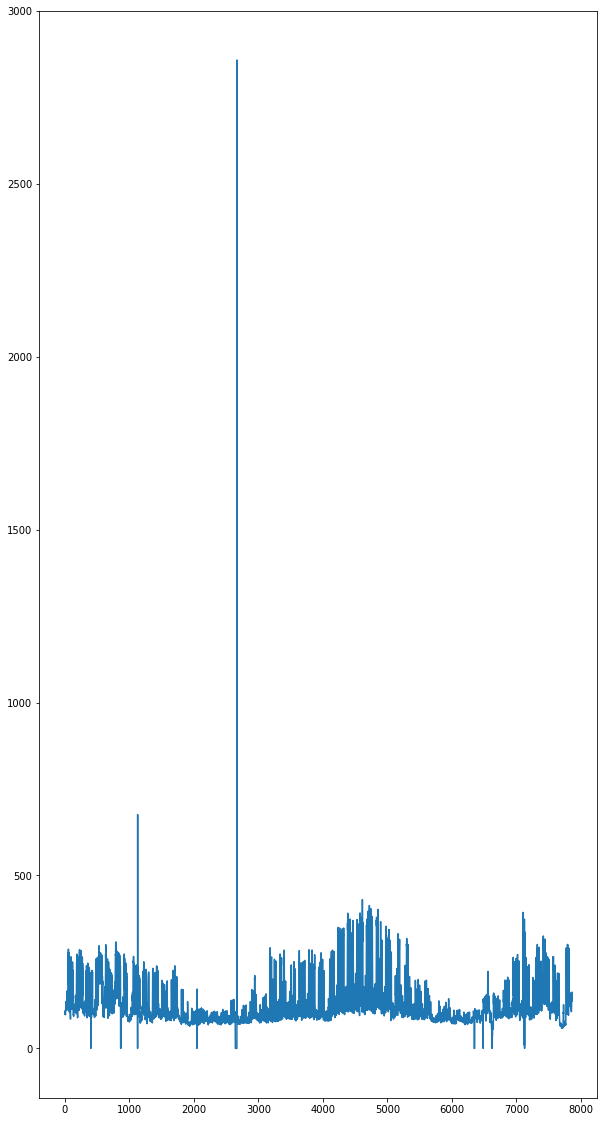

In [184]:
import matplotlib.pyplot as plt
import numpy as np

#전력량 특징 확인
print('최대 사용 전력 : {}'.format(data['Power'].max()))
print('최소 사용 전력 : {}'.format(data['Power'].min()))
print('평균 사용 전력 : {}'.format(data['Power'].mean()))
print('표준편차 사용 전력 : {}'.format(data['Power'].std()))
print('1분위 사용 전력 : {}'.format(np.percentile(data['Power'], 25)))
print('3분위 사용 전력 : {}'.format(np.percentile(data['Power'], 75)))

#전력량 그래프 확인
plt.figure(figsize=(10,20))
plt.plot(data['Power'])

In [185]:
#Time을 월, 주, 년, 일로 변환하여 column에 추가함
data['Time'] = pd.to_datetime(data['Time'], format='%Y%m%d_%H')
data["Month"] = pd.to_datetime(data["Time"]).dt.month
data['Week'] = data['Time'].dt.strftime('%U')
data['Week'] = data['Week'].astype(int)
data['Year'] = data['Time'].dt.year
data['Day'] = ((data['Time'] - pd.to_datetime(data['Year'].astype(str), format='%Y')) / pd.Timedelta(days=1) + 1).astype(int)

#이상치를 계절별로 처리하기 위하여 계절 column을 추가함
data.loc[(data["Month"] == 12) | (data["Month"] <= 2), "Season"] = "winter"
data.loc[(data["Month"] >= 3) & (data["Month"] <= 5), "Season"] = "spring"
data.loc[(data["Month"] >= 6) & (data["Month"] <= 8), "Season"] = "summer"
data.loc[(data["Month"] >= 9) & (data["Month"] <= 11), "Season"] = "autumn"

겨울 최대 사용 전력 : 676.0
겨울 최소 사용 전력 : 0.0
겨울 평균 사용 전력 : 156.30217427385887
겨울 표준편차 사용 전력 : 64.87853452468136
겨울 1분위 사용 전력 : 105.24000000001978
겨울 3분위 사용 전력 : 212.0240000000049
이상치 최대값 : 372.19999999998254
이상치 최소값 : -54.9359999999579


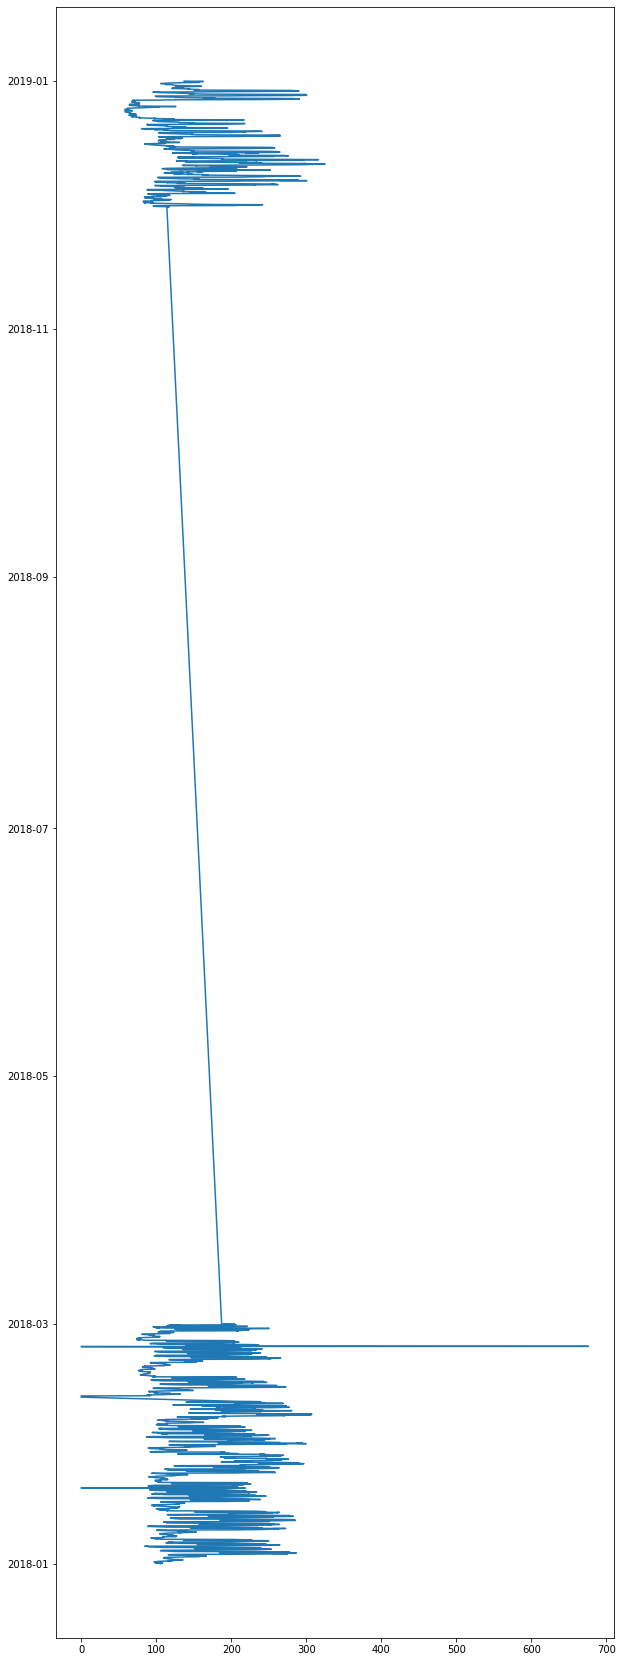

In [186]:
#겨울 이상치 탐색
winter = data.loc[(data["Month"] == 12) | (data["Month"] <= 2)]
winter_elec = winter['Power']

print('겨울 최대 사용 전력 : {}'.format(winter_elec.max()))
print('겨울 최소 사용 전력 : {}'.format(winter_elec.min()))
print('겨울 평균 사용 전력 : {}'.format(winter_elec.mean()))
print('겨울 표준편차 사용 전력 : {}'.format(winter_elec.std()))
print('겨울 1분위 사용 전력 : {}'.format(np.percentile(winter_elec, 25)))
print('겨울 3분위 사용 전력 : {}'.format(np.percentile(winter_elec, 75)))

#IQR값 계산
IQR = np.percentile(winter_elec, 75) - np.percentile(winter_elec, 25)
IQRWeight = IQR * 1.5

print('이상치 최대값 : {}'.format(np.percentile(winter_elec, 75) + IQRWeight))
print('이상치 최소값 : {}'.format(np.percentile(winter_elec, 25) - IQRWeight))

#전력 그래프 출력
plt.figure(figsize=(10,30))
plt.plot(winter['Power'], winter['Time'])

#이상치 최소값이 음수이므로 0 이하의 값은 이상치로 처리함
#정전시 전력량이 0이므로 0을 제외하여 이상치 처리함
outLierMin = winter[winter['Power'] < 0].index
outLierMax = winter[winter['Power'] > np.percentile(winter_elec, 75) + IQRWeight].index

#data에서 이상치 값들을 제외
data = data.drop(outLierMin)
data = data.drop(outLierMax)

봄 최대 사용 전력 : 2858.112000000081
봄 최소 사용 전력 : 0.0
봄 평균 사용 전력 : 101.39992763819131
봄 표준편차 사용 전력 : 70.99908805902838
봄 1분위 사용 전력 : 80.3920000000362
봄 3분위 사용 전력 : 106.48799999992477
이상치 최대값 : 145.63199999975762
이상치 최소값 : 41.24800000020336


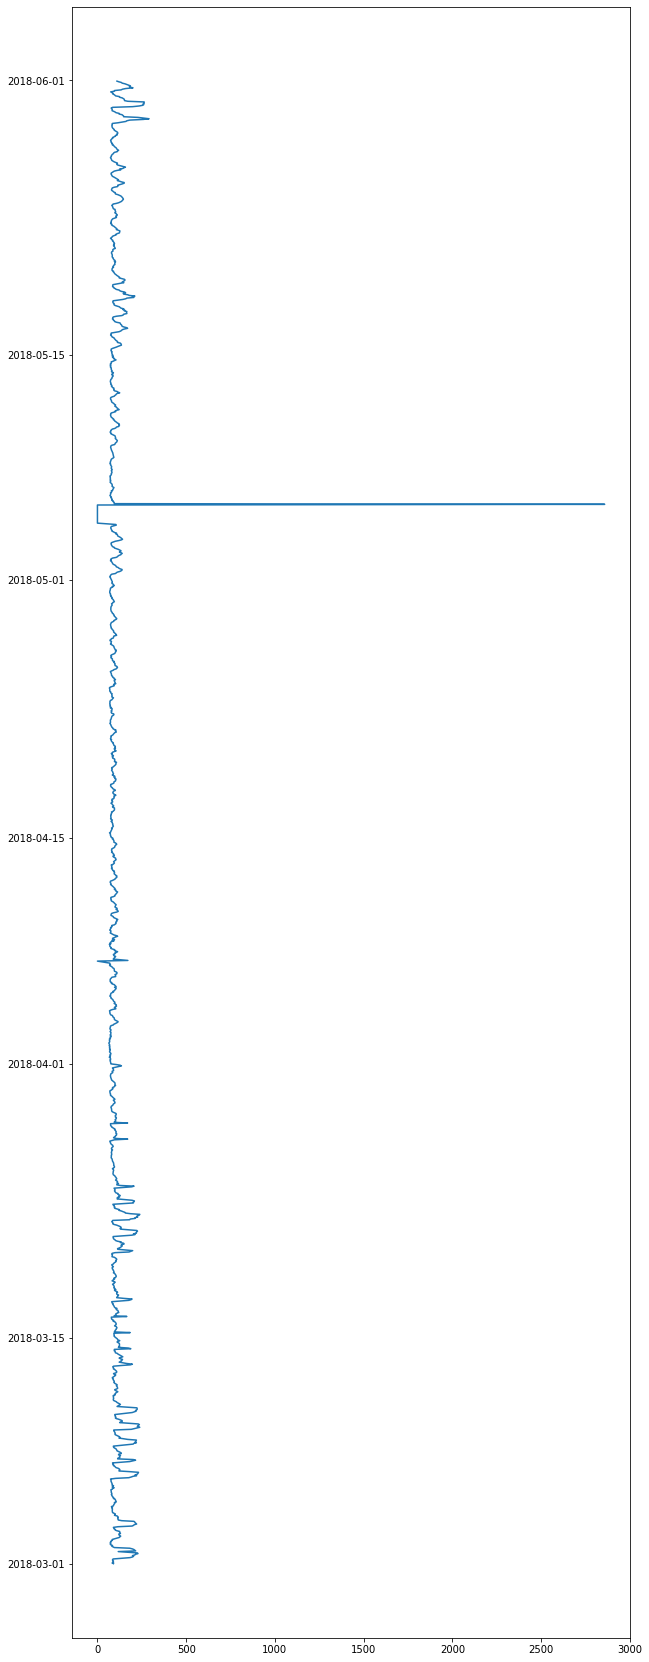

In [187]:
#봄 이상치 탐색
spring = data.loc[(data["Month"] >= 3) & (data["Month"] <= 5)]
spring_elec = spring['Power']

print('봄 최대 사용 전력 : {}'.format(spring_elec.max()))
print('봄 최소 사용 전력 : {}'.format(spring_elec.min()))
print('봄 평균 사용 전력 : {}'.format(spring_elec.mean()))
print('봄 표준편차 사용 전력 : {}'.format(spring_elec.std()))
print('봄 1분위 사용 전력 : {}'.format(np.percentile(spring_elec, 25)))
print('봄 3분위 사용 전력 : {}'.format(np.percentile(spring_elec, 75)))

#IQR값 계산
IQR = np.percentile(spring_elec, 75) - np.percentile(spring_elec, 25)
IQRWeight = IQR * 1.5
print('이상치 최대값 : {}'.format(np.percentile(spring_elec, 75) + IQRWeight))
print('이상치 최소값 : {}'.format(np.percentile(spring_elec, 25) - IQRWeight))

#전력 그래프 출력
plt.figure(figsize=(10,30))
plt.plot(spring['Power'], spring['Time'])

#이상치 탐색
#이상치 최대값이 145.6이지만 대부분 300이하이고 오류 값으로 여겨지지 않으므로 이상치 최대를 300으로 수정
outLierMin = spring[spring['Power'] <= np.percentile(spring_elec, 25) - IQRWeight].index
outLierMax = spring[spring['Power'] > 300].index

#data에서 이상치 값들을 제외
data = data.drop(outLierMin)
data = data.drop(outLierMax)

여름 최대 사용 전력 : 430.3360000000102
여름 최소 사용 전력 : 77.44000000006054
여름 평균 사용 전력 : 165.6771265306127
여름 표준편차 사용 전력 : 78.28033122647896
여름 1분위 사용 전력 : 106.2399999999907
여름 3분위 사용 전력 : 211.58399999994433
이상치 최대값 : 369.59999999987474
이상치 최소값 : -51.77599999993974


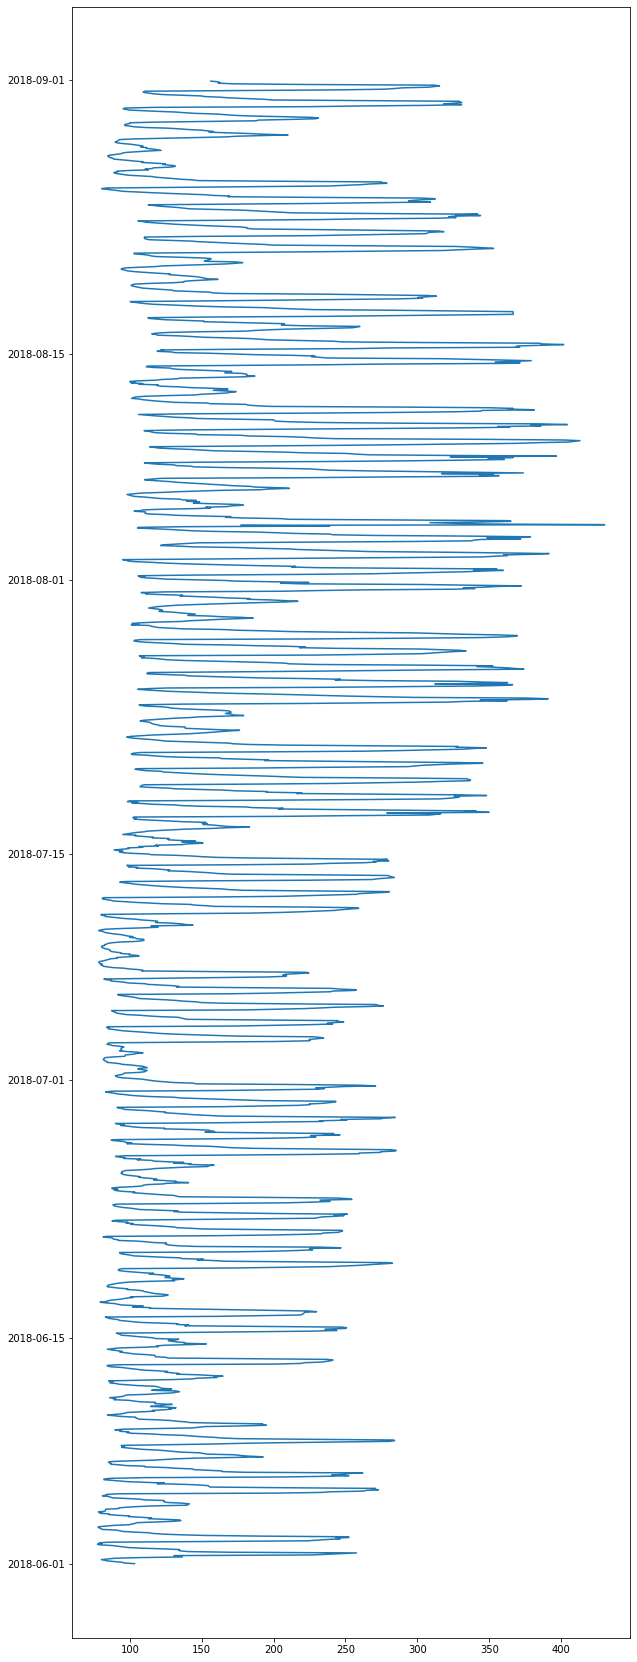

In [188]:
#여름 이상치 탐색
summer = data.loc[(data["Month"] >= 6) & (data["Month"] <= 8)]
summer_elec = summer['Power']

print('여름 최대 사용 전력 : {}'.format(summer_elec.max()))
print('여름 최소 사용 전력 : {}'.format(summer_elec.min()))
print('여름 평균 사용 전력 : {}'.format(summer_elec.mean()))
print('여름 표준편차 사용 전력 : {}'.format(summer_elec.std()))
print('여름 1분위 사용 전력 : {}'.format(np.percentile(summer_elec, 25)))
print('여름 3분위 사용 전력 : {}'.format(np.percentile(summer_elec, 75)))

#IQR값 계산
IQR = np.percentile(summer_elec, 75) - np.percentile(summer_elec, 25)
IQRWeight = IQR * 1.5
print('이상치 최대값 : {}'.format(np.percentile(summer_elec, 75) + IQRWeight))
print('이상치 최소값 : {}'.format(np.percentile(summer_elec, 25) - IQRWeight))

#전력 그래프 출력
plt.figure(figsize=(10,30))
plt.plot(summer['Power'], summer['Time'])

#이상치 최소값이 음수이므로 0 이하의 값은 이상치로 처리함
#정전시 전력량이 0이므로 0을 제외하여 이상치 처리함
outLierMin = summer[summer['Power'] < 0].index
outLierMax = summer[summer['Power'] > np.percentile(summer_elec, 75) + IQRWeight].index

#data에서 이상치 값들을 제외
data = data.drop(outLierMin)
data = data.drop(outLierMax)

가을 최대 사용 전력 : 393.2160000000149
가을 최소 사용 전력 : 0.0
가을 평균 사용 전력 : 110.95443022669954
가을 표준편차 사용 전력 : 40.44024245556948
가을 1분위 사용 전력 : 86.4000000001397
가을 3분위 사용 전력 : 125.9520000000484
이상치 최대값 : 185.27999999991147
이상치 최소값 : 27.072000000276645


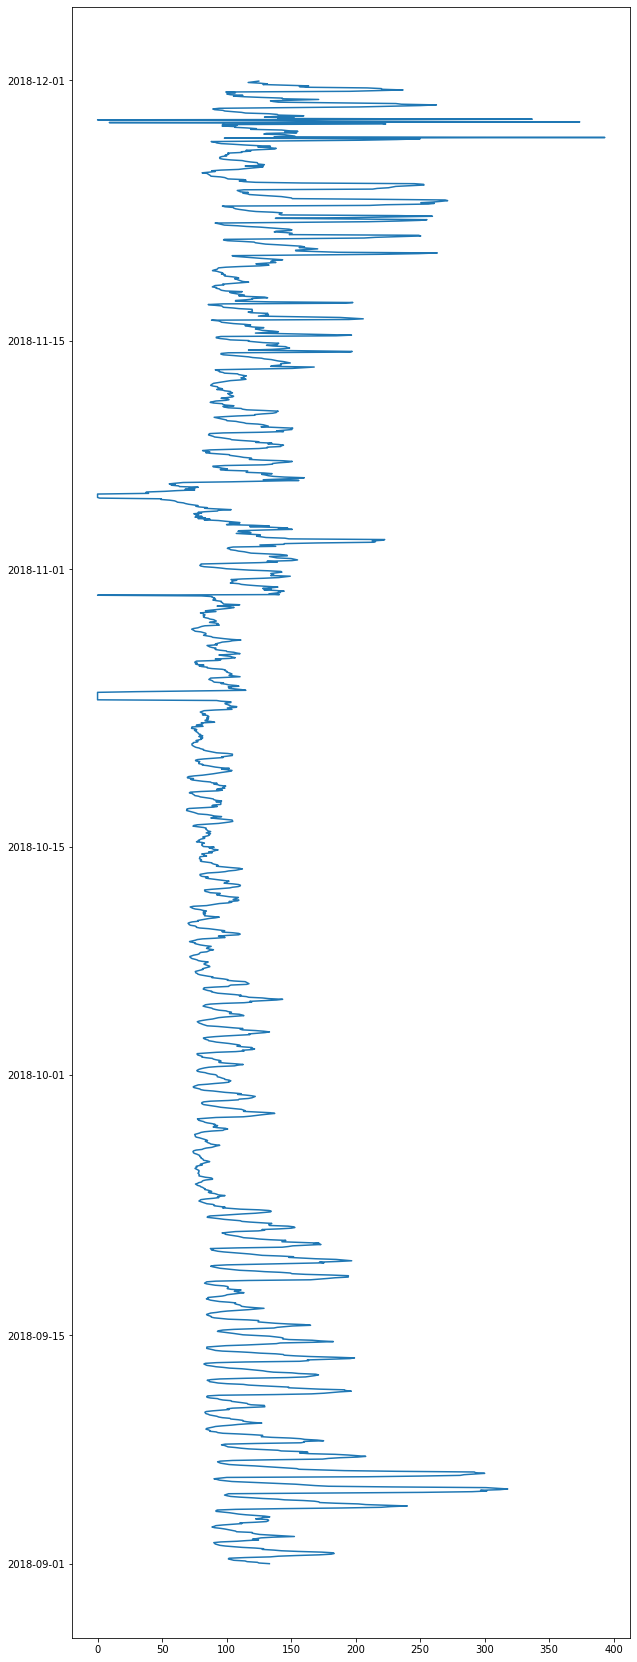

In [189]:
#가을 이상치 탐색

autumn = data.loc[(data["Month"] >= 9) & (data["Month"] <= 11)]
autumn_elec = autumn['Power']

print('가을 최대 사용 전력 : {}'.format(autumn_elec.max()))
print('가을 최소 사용 전력 : {}'.format(autumn_elec.min()))
print('가을 평균 사용 전력 : {}'.format(autumn_elec.mean()))
print('가을 표준편차 사용 전력 : {}'.format(autumn_elec.std()))
print('가을 1분위 사용 전력 : {}'.format(np.percentile(autumn_elec, 25)))
print('가을 3분위 사용 전력 : {}'.format(np.percentile(autumn_elec, 75)))

#IQR값 계산
IQR = np.percentile(autumn_elec, 75) - np.percentile(autumn_elec, 25)
IQRWeight = IQR * 1.5
print('이상치 최대값 : {}'.format(np.percentile(autumn_elec, 75) + IQRWeight))
print('이상치 최소값 : {}'.format(np.percentile(autumn_elec, 25) - IQRWeight))

#전력 그래프 출력
plt.figure(figsize=(10,30))
plt.plot(autumn['Power'], autumn['Time'])

#정전시 전력량이 0이므로 0을 제외하여 이상치 처리함
#이상치 최대값이 185.27이지만 대부분 350이하이고 오류 값으로 여겨지지 않으므로 이상치 최대를 350으로 수정
outLierMin = autumn[autumn['Power'] < 0].index
outLierMax = autumn[autumn['Power'] > 350].index

#이상치 제외
data = data.drop(outLierMin)
data = data.drop(outLierMax)

In [190]:
grouped_data = data.groupby('Week')

# 그룹화된 데이터 확인
for group_name, group_data in grouped_data:
    outLierMin = group_data[group_data['Power'] <= np.percentile(group_data['Power'], 25) - IQRWeight].index
    outLierMax = group_data[group_data['Power'] > np.percentile(group_data['Power'], 75) + IQRWeight].index
    data = data.drop(outLierMin)
    data = data.drop(outLierMax)

In [191]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 랜덤 포레스트 모델 생성 및 학습
model = RandomForestRegressor(n_estimators=100)

#시간을 숫자로 변환
data["Time"] = (data["Time"] - data["Time"].iloc[0]).dt.total_seconds() / 3600

#모델 feature 추가
X = data[["Time", "Season", "Month", "Week"]]
X = pd.concat([X.drop('Season', axis=1), pd.get_dummies(X['Season'])], axis=1)

#전력량 feature 추가
Y = data["Power"]

#train test 분리
X_train, X_test, y_train, y_test = train_test_split(X, Y)

#모델 학습
model.fit(X_train, y_train)

#모델 점수
print("test set score :", model.score(X_test, y_test))

test set score : 0.8033053271347202
